In [57]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

In [58]:
# 1) Wczytanie danych
path = "rent-poznan.xlsx"
df = pd.read_excel(path)

In [59]:
df.head()

,id,date_activ,date_modif,date_expire,individual,price,flat_area,flat_rooms,flat_floor_no,flat_build_year,...,flat_internet,flat_television,flat_phone,flat_anti_blinds,flat_anti_doors_windows,flat_intercom,flat_monitoring,flat_alarm_sys,flat_closed_area,quarter
0,19576742,2015-03-24,2020-09-05,2020-10-05,True,1400,30.0,1,2.0,0,...,False,False,False,False,False,True,False,False,False,Rataje
1,20292499,2013-07-19,2020-08-30,2020-09-09,True,4600,160.0,4,4.0,1900,...,True,True,True,False,False,True,True,True,False,Stare Miasto
2,25876297,2014-04-05,2019-09-10,2019-09-30,True,2300,54.0,3,1.0,2009,...,True,True,False,True,True,True,True,False,True,Centrum
3,30574847,2014-08-10,2020-03-03,2020-03-10,True,1600,49.0,2,5.0,0,...,False,False,False,False,True,True,False,False,False,Górna Wilda
4,30774505,2014-08-17,2019-11-15,2019-12-15,True,1200,32.5,1,3.0,2000,...,False,False,False,False,False,True,True,False,False,Rataje


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16448 entries, 0 to 16447
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       16448 non-null  int64         
 1   date_activ               16448 non-null  datetime64[ns]
 2   date_modif               16448 non-null  datetime64[ns]
 3   date_expire              16448 non-null  datetime64[ns]
 4   individual               16448 non-null  bool          
 5   price                    16448 non-null  int64         
 6   flat_area                16448 non-null  float64       
 7   flat_rooms               16448 non-null  int64         
 8   flat_floor_no            15775 non-null  float64       
 9   flat_build_year          16448 non-null  int64         
 10  flat_furnished           16448 non-null  bool          
 11  flat_rent                16448 non-null  int64         
 12  flat_deposit             16448 n

In [61]:
# 2) Liczba braków w kolumnach
missing = df.isna().sum().sort_values(ascending=False)

print("Braki danych (liczba NA) w kolumnach:")
print(missing[missing > 0])

Braki danych (liczba NA) w kolumnach:
building_material    7530
flat_status          5086
flat_windows         4768
flat_heating         4148
building_type        2702
flat_floor_no         673
dtype: int64


In [62]:
# liczba obserwacji
n = len(df)

missing = df.isna().sum()
missing_pct = (missing / n) * 100

# tylko kolumny z brakami
missing_df = (
    pd.DataFrame({
        "Liczba braków": missing,
        "Procent braków": missing_pct
    })
    .query("`Liczba braków` > 0")
    .sort_values("Liczba braków", ascending=False)
)

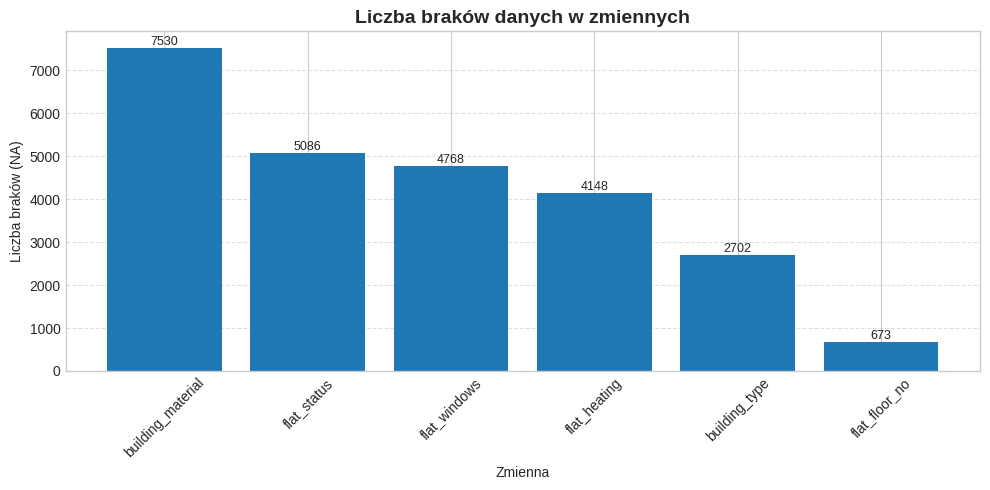

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.bar(
    missing_df.index,
    missing_df["Liczba braków"]
)

ax.set_title("Liczba braków danych w zmiennych", fontsize=14, weight="bold")
ax.set_ylabel("Liczba braków (NA)")
ax.set_xlabel("Zmienna")

ax.tick_params(axis="x", rotation=45)
ax.grid(axis="y", linestyle="--", alpha=0.6)

# etykiety nad słupkami
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()

In [64]:
# 3) Procent braków
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

print("\nBraki danych (%):")
print(missing_pct[missing_pct > 0].round(2))


Braki danych (%):
building_material    45.78
flat_status          30.92
flat_windows         28.99
flat_heating         25.22
building_type        16.43
flat_floor_no         4.09
dtype: float64


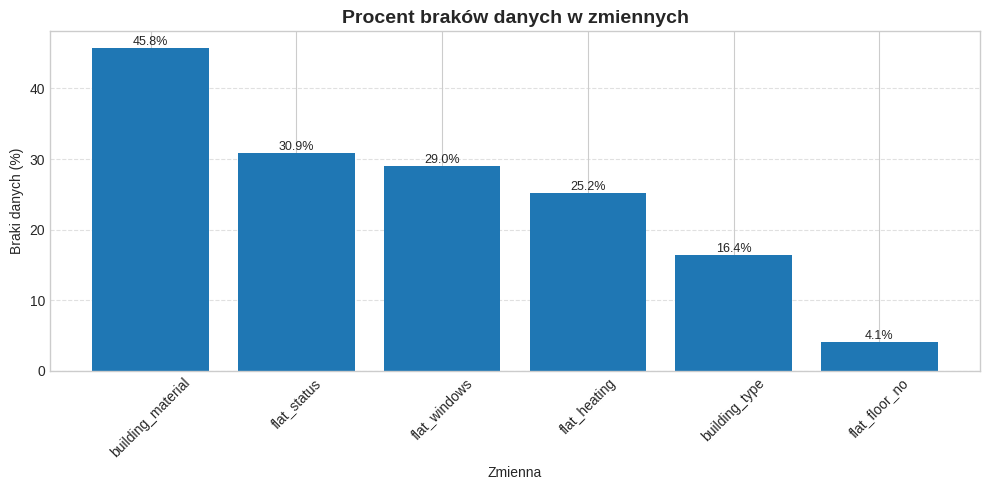

In [65]:
# 5) Wykres: procent braków
fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.bar(
    missing_df.index,
    missing_df["Procent braków"]
)

ax.set_title("Procent braków danych w zmiennych", fontsize=14, weight="bold")
ax.set_ylabel("Braki danych (%)")
ax.set_xlabel("Zmienna")

ax.tick_params(axis="x", rotation=45)
ax.grid(axis="y", linestyle="--", alpha=0.6)

# etykiety procentowe
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()

In [66]:
# USUWANIE BRAKÓW

df_dropna = df.dropna()

In [67]:
df_dropna = df.dropna(subset=[
    "building_material",
    "flat_status",
    "flat_windows",
    "flat_heating",
    "building_type",
    "flat_floor_no"
])

In [96]:
# cena za m²
df_dropna["price_per_m2"] = df_dropna["price"] / df_dropna["flat_area"]

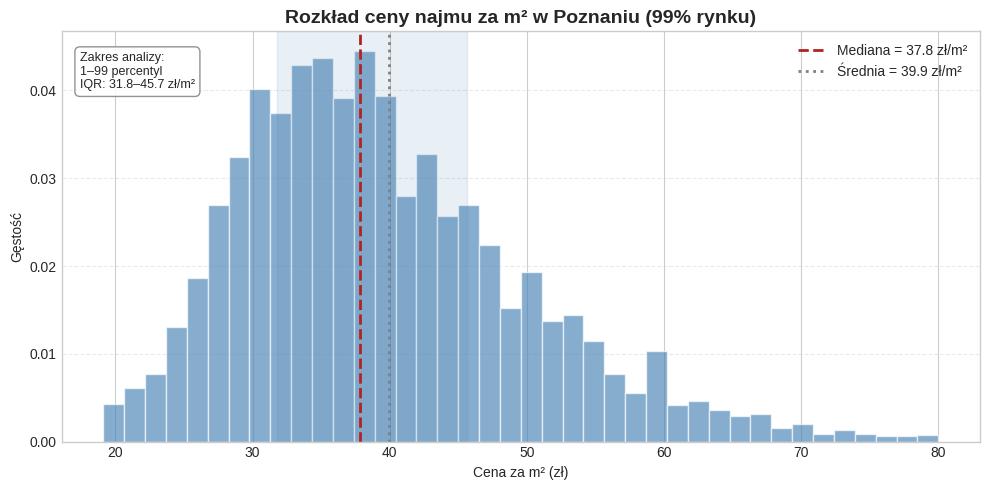

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Przygotowanie danych
# =========================
price_m2 = df_dropna["price_per_m2"]

# percentyle
p01, p99 = price_m2.quantile([0.01, 0.99])
q25, q75 = price_m2.quantile([0.25, 0.75])

# statystyki
median = price_m2.median()
mean = price_m2.mean()

# dane ograniczone do 99% rynku (TYLKO do wizualizacji)
price_m2_99 = price_m2[(price_m2 >= p01) & (price_m2 <= p99)]

# =========================
# Wykres
# =========================
fig, ax = plt.subplots(figsize=(10, 5))

# histogram
ax.hist(
    price_m2_99,
    bins=40,
    density=True,
    color="steelblue",
    alpha=0.65,
    edgecolor="white"
)

# IQR (25–75%)
ax.axvspan(
    q25, q75,
    color="steelblue",
    alpha=0.12
)

# linie statystyczne
ax.axvline(
    median,
    color="firebrick",
    linestyle="--",
    linewidth=2,
    label=f"Mediana = {median:.1f} zł/m²"
)

ax.axvline(
    mean,
    color="gray",
    linestyle=":",
    linewidth=2,
    label=f"Średnia = {mean:.1f} zł/m²"
)

# tytuły i opisy
ax.set_title(
    "Rozkład ceny najmu za m² w Poznaniu (99% rynku)",
    fontsize=14,
    weight="bold"
)
ax.set_xlabel("Cena za m² (zł)")
ax.set_ylabel("Gęstość")

# siatka
ax.grid(axis="y", linestyle="--", alpha=0.4)

# legenda (TYLKO linie)
ax.legend(loc="upper right", frameon=False)

# ramka metodologiczna
ax.text(
    0.02, 0.95,
    "Zakres analizy:\n"
    "1–99 percentyl\n"
    f"IQR: {q25:.1f}–{q75:.1f} zł/m²",
    transform=ax.transAxes,
    ha="left",
    va="top",
    fontsize=9,
    bbox=dict(
        boxstyle="round,pad=0.4",
        facecolor="white",
        edgecolor="gray",
        alpha=0.85
    )
)

plt.tight_layout()
plt.show()

In [139]:
# --- GRUPOWANIE DZIELNIC (TOP 8 + Inne) ---
top_quarters = (
    df_dropna["quarter"]
    .value_counts()
    .nlargest(8)
    .index
)

df_dropna = df_dropna.copy()  # ważne, żeby uniknąć warningów

df_dropna["quarter_grouped"] = df_dropna["quarter"].where(
    df_dropna["quarter"].isin(top_quarters),
    "Inne"
)

/tmp/ipython-input-2556759618.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues")
/tmp/ipython-input-2556759618.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


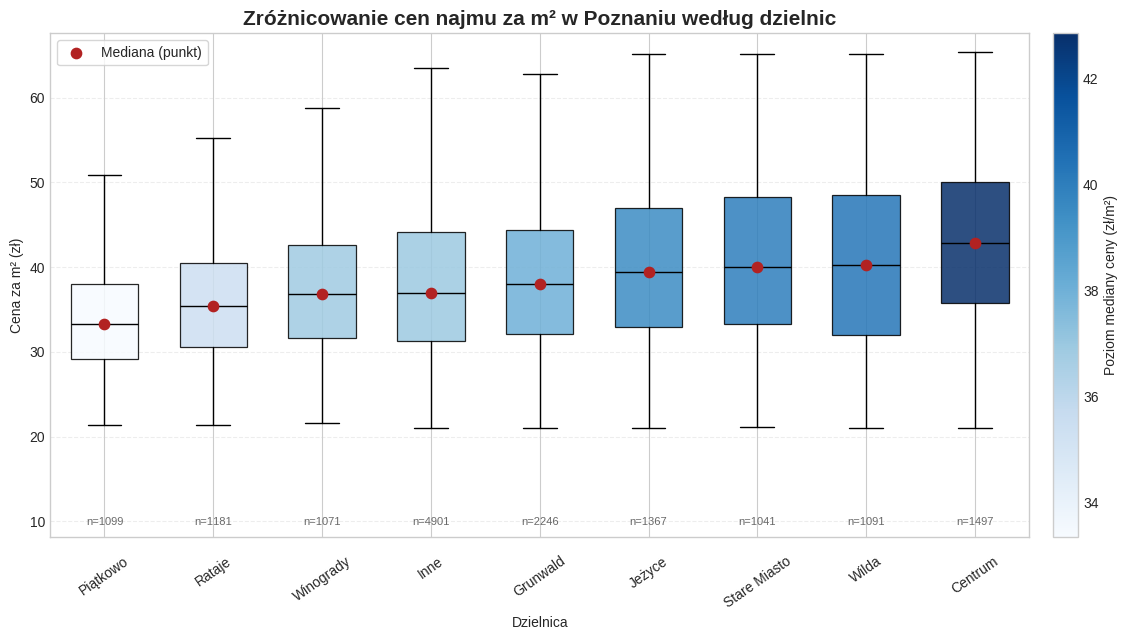

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# =========================
# 📊 WYKRES 2: Cena za m² vs dzielnica (PRO, czytelny)
# Wymaga kolumn: "quarter" (dzielnica) + "price_per_m2"
# DataFrame wejściowy: df_dropna (już po dropna)
# =========================

# 1) (opcjonalnie) ucięcie skrajności - 99% rynku (na kopii, żeby nie psuć innych wykresów)
p_low, p_high = df_dropna["price_per_m2"].quantile([0.01, 0.99])
df_plot = df_dropna.loc[
    (df_dropna["price_per_m2"] >= p_low) & (df_dropna["price_per_m2"] <= p_high)
].copy()

# 2) Top 8 dzielnic + "Inne"
top_quarters = df_plot["quarter"].value_counts().nlargest(8).index
df_plot["quarter_grouped"] = np.where(df_plot["quarter"].isin(top_quarters), df_plot["quarter"], "Inne")

# 3) Kolejność wg mediany (narracja: taniej -> drożej)
order = (
    df_plot.groupby("quarter_grouped")["price_per_m2"]
    .median()
    .sort_values()
    .index
    .tolist()
)

# 4) Dane i statystyki
groups = [df_plot.loc[df_plot["quarter_grouped"] == q, "price_per_m2"].values for q in order]
counts = [len(g) for g in groups]
medians = [np.median(g) if len(g) else np.nan for g in groups]

# 5) Kolory boxów wg mediany
norm = mcolors.Normalize(vmin=np.nanmin(medians), vmax=np.nanmax(medians))
cmap = cm.get_cmap("Blues")
box_colors = [cmap(norm(m)) for m in medians]

# 6) Rysunek
fig, ax = plt.subplots(figsize=(12.5, 6.5))

bp = ax.boxplot(
    groups,
    labels=order,
    showfliers=False,
    patch_artist=True,
    widths=0.62
)

for patch, color in zip(bp["boxes"], box_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
    patch.set_linewidth(0.9)
    patch.set_alpha(0.85)

for element in ["whiskers", "caps", "medians"]:
    for line in bp[element]:
        line.set_color("black")
        line.set_linewidth(1.0)

# 7) Mediany jako punkty
xpos = np.arange(1, len(order) + 1)
ax.scatter(xpos, medians, s=55, color="firebrick", zorder=3, label="Mediana (punkt)")

# 8) Etykiety osi X + miejsce na n=...
ax.tick_params(axis="x", rotation=35, pad=12)

# Najpierw bierzemy obecne limity
ymin, ymax = ax.get_ylim()
y_range = ymax - ymin

# Dajemy dodatkowe miejsce w dół i dopiero wtedy ustawiamy napis "n=..."
extra_bottom = 0.22 * y_range
ax.set_ylim(ymin - extra_bottom, ymax)

# Po aktualizacji osi liczymy punkt tekstu (żeby był zawsze w osi i nie nachodził)
ymin2, ymax2 = ax.get_ylim()
y_range2 = ymax2 - ymin2
y_text = ymin2 + 0.02 * y_range2  # 2% od dołu wykresu (stabilne, bez kolizji)

for x, n in zip(xpos, counts):
    ax.text(x, y_text, f"n={n}", ha="center", va="bottom", fontsize=8, color="dimgray")

# 9) Tytuły / osie / siatka
ax.set_title("Zróżnicowanie cen najmu za m² w Poznaniu według dzielnic", fontsize=15, weight="bold")
ax.set_ylabel("Cena za m² (zł)")
ax.set_xlabel("Dzielnica")

ax.grid(axis="y", linestyle="--", alpha=0.35)
ax.set_axisbelow(True)

# 10) Colorbar (kolor = mediana)
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label("Poziom mediany ceny (zł/m²)")

ax.legend(loc="upper left", frameon=True)

# 11) Marginesy (ważne)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.show()


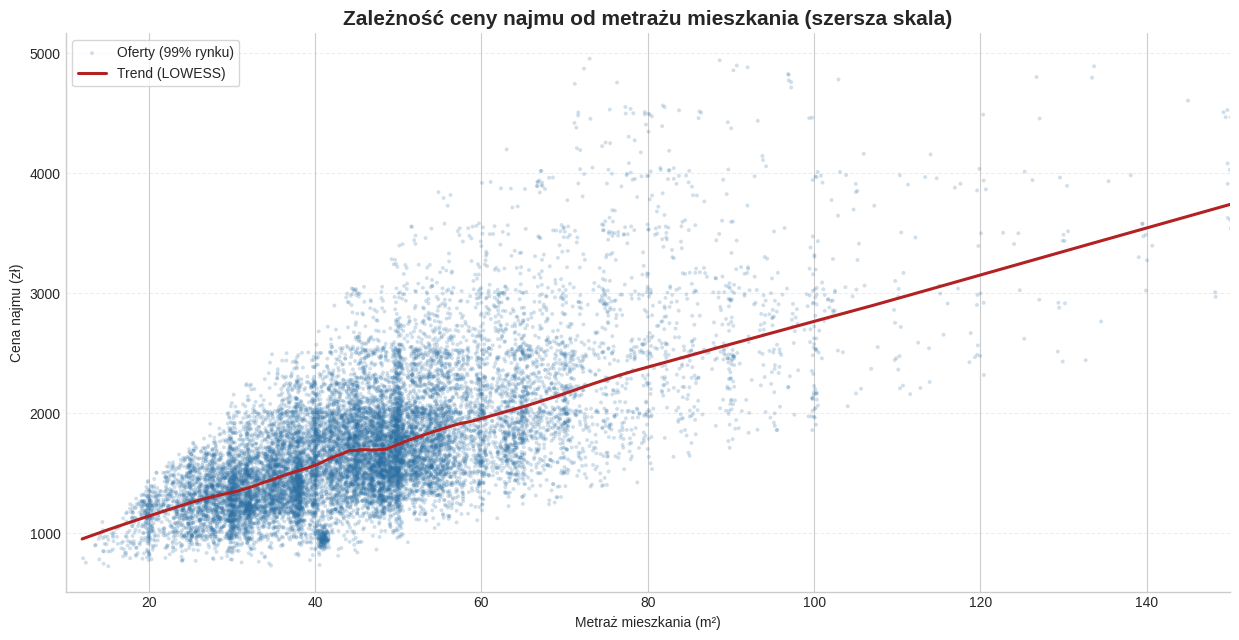

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# =========================
# 📊 WYKRES 3: Cena najmu vs metraż mieszkania (PRO)
# - zakres metrażu: od 10 m² do 150 m²
# - 99% rynku (ucięcie skrajnych CEN, nie metrażu)
# - skala LINIOWA ceny (PLN)
# - intensywne punkty gęstości
# - trend LOWESS
# =========================

# 1) Zakres danych
# --- metraż: świadomie od 10 m² (mikrokawalerki)
# --- cena: ucięcie skrajnych 1% górnych obserwacji
price_low, price_high = df_dropna["price"].quantile([0.01, 0.995])

df_plot = df_dropna[
    (df_dropna["flat_area"].between(10, 150)) &
    (df_dropna["price"].between(price_low, price_high))
].copy()

# 2) Mikro-jitter (WYŁĄCZNIE wizualny, zachowuje formę chmury)
rng = np.random.default_rng(42)
x_jitter = df_plot["flat_area"] + rng.normal(0, 0.35, size=len(df_plot))
y_jitter = df_plot["price"] + rng.normal(0, 40, size=len(df_plot))

# 3) LOWESS – liczony na danych BEZ jittera
lowess_curve = lowess(
    df_plot["price"],
    df_plot["flat_area"],
    frac=0.25,
    return_sorted=True
)

# 4) Wykres
fig, ax = plt.subplots(figsize=(12.5, 6.5))

# punkty – gęstość (ta sama forma co wcześniej)
ax.scatter(
    x_jitter,
    y_jitter,
    s=8,
    alpha=0.22,              # ↑ większa intensywność koloru
    color="#2C6FA3",
    edgecolors="none",
    label="Oferty (99% rynku)"
)

# linia trendu
ax.plot(
    lowess_curve[:, 0],
    lowess_curve[:, 1],
    color="firebrick",
    linewidth=2.2,
    label="Trend (LOWESS)"
)

# 5) Opisy
ax.set_title(
    "Zależność ceny najmu od metrażu mieszkania (szersza skala)",
    fontsize=15,
    weight="bold"
)
ax.set_xlabel("Metraż mieszkania (m²)")
ax.set_ylabel("Cena najmu (zł)")

# 6) Styl raportowy
ax.grid(axis="y", linestyle="--", alpha=0.35)
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xlim(10, 150)
ax.legend(loc="upper left", frameon=True)

plt.tight_layout()
plt.show()


[INFO] Dopasowane jednostki (geocode): 64 / 77
[INFO] Nazwy z danych, których nie dopasowano w OSM (sprawdź pisownię / nazwy):
 - Biała Góra
 - Centrum
 - Chwaliszewo
 - Czekalskie
 - Dolna Wilda
 - Górna Wilda
 - Marcelin
 - Naramowickie Osiedle
 - Podolany
 - Trójpole
 - Winiary
 - Winogrady
 - Wzgórze Przemysława


/tmp/ipython-input-2859314330.py:175: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


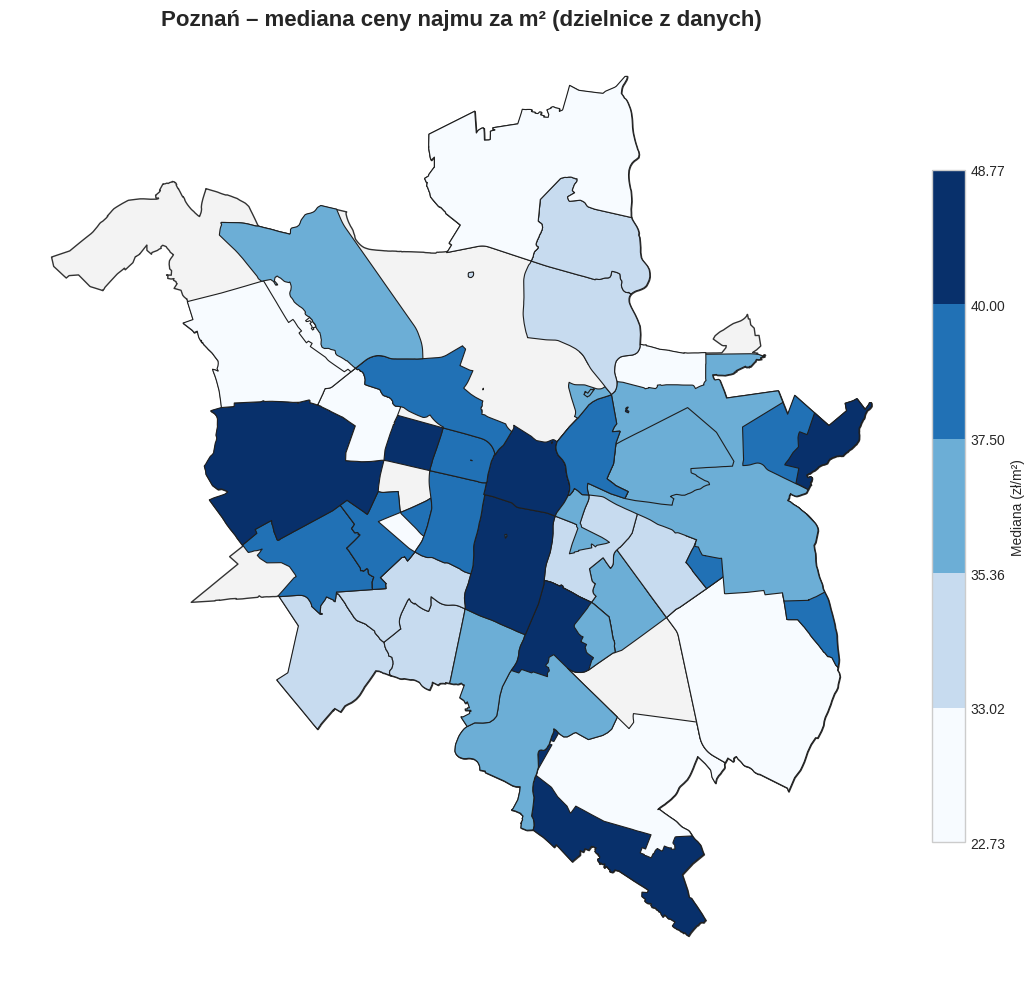

/tmp/ipython-input-2859314330.py:175: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


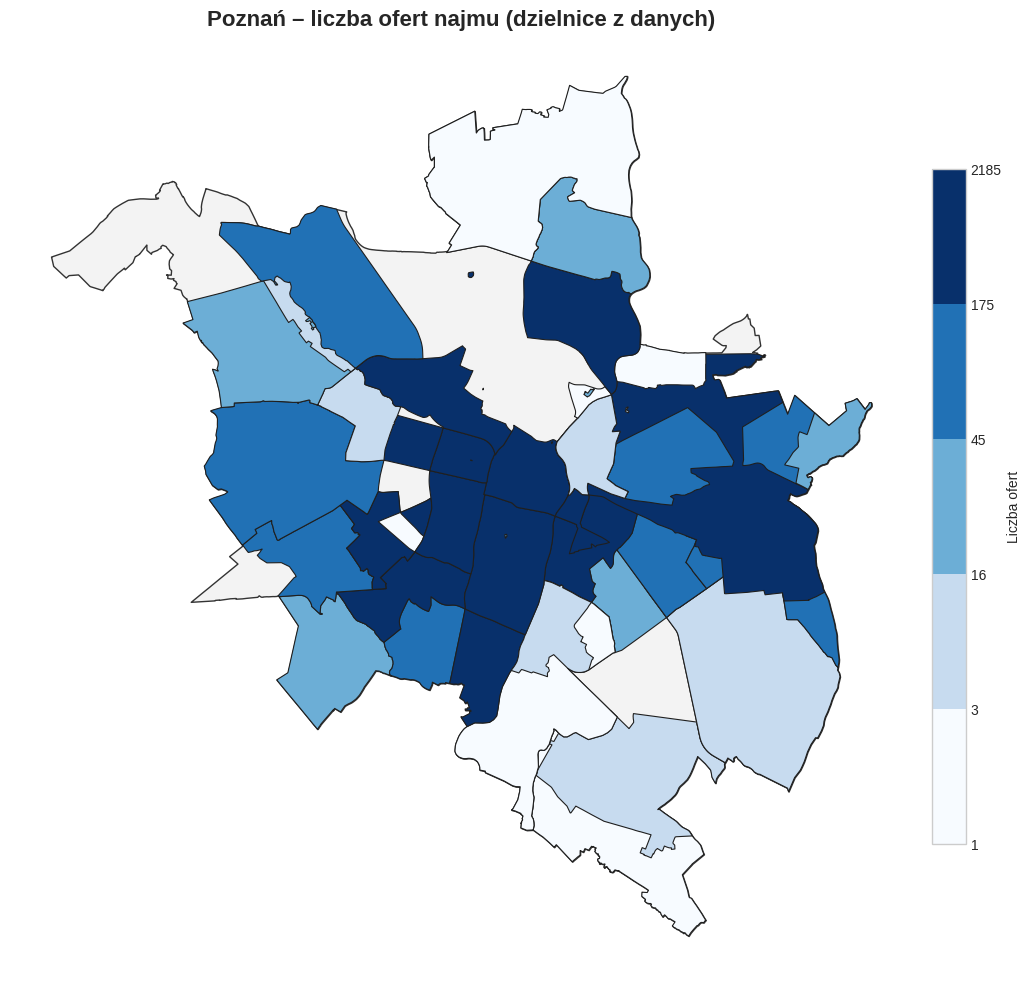

In [173]:
# ============================================================
# 🗺️ MAPY CHOROPLETH: Poznań – mediana ceny za m² + liczba ofert
# (działa przy danych z nazwami dzielnic typu: Jeżyce, Grunwald, Centrum, Wilda...)
#
# ✅ Co robi kod:
# 1) czyści dane (99% rynku)
# 2) liczy statystyki per "dzielnica" z Twoich danych
# 3) pobiera granice dzielnic z OSM (geocode) dla nazw: "<dzielnica>, Poznań, Poland"
# 4) scala statystyki z geometrią
# 5) rysuje 2 mapy (median_price_m2 i offers) z poprawnym colorbar
#
# Wymagane biblioteki:
# pip install osmnx geopandas shapely mapclassify matplotlib pandas numpy
# ============================================================

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import geopandas as gpd
import osmnx as ox
import mapclassify

# ------------------------------------------------------------
# 0) Oczekiwana ramka danych:
# df_dropna: kolumny co najmniej:
# - "quarter" (nazwa dzielnicy z danych, np. Jeżyce, Grunwald, Centrum...)
# - "price_per_m2"
# - "price"
# - "flat_area"
# ------------------------------------------------------------

# ------------------------------------------------------------
# 1) Przygotowanie danych (99% rynku) + statystyki per dzielnica
# ------------------------------------------------------------
df = df_dropna.copy()

# 99% rynku (ucięcie skrajności) – możesz zmienić progi
p_m2_low, p_m2_high = df["price_per_m2"].quantile([0.01, 0.99])
p_price_low, p_price_high = df["price"].quantile([0.01, 0.995])
p_area_low, p_area_high = df["flat_area"].quantile([0.01, 0.99])

df = df[
    df["price_per_m2"].between(p_m2_low, p_m2_high) &
    df["price"].between(p_price_low, p_price_high) &
    df["flat_area"].between(p_area_low, p_area_high)
].copy()

# Standaryzacja nazw dzielnic (żeby OSM łatwiej łapał)
def _norm_name(x: str) -> str:
    if pd.isna(x):
        return x
    x = str(x).strip()
    x = re.sub(r"\s+", " ", x)
    return x

df["quarter_clean"] = df["quarter"].map(_norm_name)

stats = (
    df.groupby("quarter_clean")
      .agg(
          median_price_m2=("price_per_m2", "median"),
          offers=("price_per_m2", "size")
      )
      .reset_index()
      .rename(columns={"quarter_clean": "district"})
)

# ------------------------------------------------------------
# 2) Pobieranie geometrii dzielnic z OSM (geocode)
#    Uwaga: OSM może zwrócić kilka obiektów -> bierzemy największy poligon.
# ------------------------------------------------------------
def geocode_district_polygon(district_name: str) -> gpd.GeoDataFrame | None:
    """
    Próbujemy znaleźć geometrię dla: "<district>, Poznań, Poland".
    Zwraca GeoDataFrame z 1 rekordem (największy poligon) albo None.
    """
    query = f"{district_name}, Poznań, Poland"
    try:
        gdf = ox.geocode_to_gdf(query)
        if gdf is None or gdf.empty:
            return None

        # bierzemy tylko poligony (czasem może przyjść punkt)
        gdf = gdf[gdf.geometry.type.isin(["Polygon", "MultiPolygon"])].copy()
        if gdf.empty:
            return None

        # wybieramy największy obszar (w metrycznym układzie)
        gdf_m = gdf.to_crs(2180)
        gdf["__area"] = gdf_m.area.values
        gdf = gdf.sort_values("__area", ascending=False).drop(columns="__area")
        return gdf.head(1)

    except Exception:
        return None


# granica Poznania (tło)
poznan = ox.geocode_to_gdf("Poznań, Poland")
poznan = poznan[poznan.geometry.type.isin(["Polygon", "MultiPolygon"])].to_crs(4326)

# geokodowanie dzielnic z danych
district_polys = []
unmatched = []

for d in stats["district"].tolist():
    poly = geocode_district_polygon(d)
    if poly is None or poly.empty:
        unmatched.append(d)
        continue

    poly = poly.to_crs(4326)
    poly["district"] = d
    district_polys.append(poly[["district", "geometry"]])

gdf_districts = gpd.GeoDataFrame(pd.concat(district_polys, ignore_index=True), crs="EPSG:4326") \
    if district_polys else gpd.GeoDataFrame(columns=["district", "geometry"], crs="EPSG:4326")

# info w konsoli
print(f"[INFO] Dopasowane jednostki (geocode): {len(gdf_districts)} / {len(stats)}")
if unmatched:
    print("[INFO] Nazwy z danych, których nie dopasowano w OSM (sprawdź pisownię / nazwy):")
    for u in unmatched:
        print(" -", u)

# ------------------------------------------------------------
# 3) Merge geometrii z danymi
# ------------------------------------------------------------
gdf_merge = gdf_districts.merge(stats, on="district", how="left")

# Opcjonalnie: przytnij do granic Poznania (czasem geocode łapie większy obszar)
# (robimy clip po granicy miasta)
try:
    gdf_merge = gpd.clip(gdf_merge, poznan)
except Exception:
    pass

# ------------------------------------------------------------
# 4) Funkcja do mapy choropleth z poprawnym colorbar (bez błędu legend_kwds)
# ------------------------------------------------------------
def plot_choropleth_quantiles(
    gdf_city: gpd.GeoDataFrame,
    gdf_data: gpd.GeoDataFrame,
    column: str,
    title: str,
    cbar_label: str,
    cmap_name: str = "Blues",
    k: int = 5
):
    fig, ax = plt.subplots(figsize=(10.5, 10))

    # tło: granica Poznania
    gdf_city.plot(ax=ax, color="#f3f3f3", edgecolor="#333333", linewidth=1.0)

    data = gdf_data.dropna(subset=[column]).copy()
    if data.empty:
        ax.set_title(title, fontsize=16, weight="bold")
        ax.axis("off")
        plt.tight_layout()
        plt.show()
        return

    # klasy kwantylowe
    values = data[column].astype(float).values
    classifier = mapclassify.Quantiles(values, k=min(k, len(np.unique(values))))
    bins = classifier.bins  # górne granice klas

    # boundary norm do colorbar
    vmin = np.nanmin(values)
    boundaries = np.r_[vmin, bins]  # [min, q1, q2, ..., qk]
    cmap = cm.get_cmap(cmap_name)
    norm = mcolors.BoundaryNorm(boundaries=boundaries, ncolors=cmap.N, clip=True)

    # warstwa danych
    data.plot(
        ax=ax,
        column=column,
        cmap=cmap_name,
        linewidth=0.8,
        edgecolor="#1f1f1f",
        norm=norm
    )

    # colorbar (prawdziwy, bez legend_kwds["label"])
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, fraction=0.035, pad=0.02)
    cbar.set_label(cbar_label)

    ax.set_title(title, fontmsize=16, weight="bold")
    ax.axis("off")
    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------
# 5) MAPA 1: Mediana ceny za m²
# ------------------------------------------------------------
plot_choropleth_quantiles(
    gdf_city=poznan,
    gdf_data=gdf_merge,
    column="median_price_m2",
    title="Poznań – mediana ceny najmu za m² (dzielnice z danych)",
    cbar_label="Mediana (zł/m²)",
    cmap_name="Blues",
    k=5
)

# ------------------------------------------------------------
# 6) MAPA 2: Liczba ofert
# ------------------------------------------------------------
plot_choropleth_quantiles(
    gdf_city=poznan,
    gdf_data=gdf_merge,
    column="offers",
    title="Poznań – liczba ofert najmu (dzielnice z danych)",
    cbar_label="Liczba ofert",
    cmap_name="Blues",
    k=5
)


In [177]:
import pandas as pd

# =========================
# SANITY CHECK: spójność mapy median
# =========================

# 1. Wczytanie danych
df = pd.read_excel('rent-poznan.xlsx')

# 2. Podstawowe czyszczenie
df = df.dropna(subset=["quarter", "price", "flat_area"])
df = df[df["flat_area"] > 10]  # bezpieczeństwo

# 3. Cena za m²
df["price_per_m2"] = df["price"] / df["flat_area"]

# 4. Agregacja po dzielnicach
sanity = (
    df.groupby("quarter")
    .agg(
        n_ofert=("price", "count"),
        med_price_m2=("price_per_m2", "median"),
        med_area=("flat_area", "median"),
        med_price_total=("price", "median"),
        mean_price_m2=("price_per_m2", "mean")
    )
    .sort_values("med_price_m2", ascending=False)
)

# 5. Zaokrąglenia (czytelność)
sanity = sanity.round({
    "med_price_m2": 2,
    "mean_price_m2": 2,
    "med_area": 1,
    "med_price_total": 0
})

sanity


,n_ofert,med_price_m2,med_area,med_price_total,mean_price_m2
quarter,,,,,
Marlewo,1,69.09,55.0,3800.0,69.09
Trójpole,1,56.90,29.0,1650.0,56.90
Biała Góra,1,50.00,47.0,2350.0,50.00
Zieliniec,16,48.77,41.0,2000.0,43.12
Ostrów Tumski,20,46.30,27.0,1300.0,41.96
...,...,...,...,...,...
Karolin,1,27.36,98.7,2700.0,27.36
Święty Roch,3,26.92,52.0,1400.0,26.79
Wilczy Młyn,11,25.53,65.0,1590.0,29.52


In [166]:
city_median = df_dropna["price_per_m2"].median()
ax.axhline(city_median, color="firebrick", linestyle="--", linewidth=1)

In [169]:
# df_dropna["area_segment"] = pd.cut(
#     df_dropna["flat_area"],
#     bins=[0, 30, 50, 70, 100, 300],
#     labels=["<30", "30–50", "50–70", "70–100", "100+"]
# )

=== SANITY CHECK (po spójnych filtrach) ===
Liczba rekordów: 15,535
Metraż: min=15.00, med=45.50, max=107.00
Cena:   min=800, med=1600, max=4500
zł/m²:  min=17.70, med=37.50, max=70.45

Top dzielnice (liczba ofert):
quarter
Grunwald        2230
Centrum         1510
Jeżyce          1375
Rataje          1187
Wilda           1132
Piątkowo        1090
Winogrady       1075
Stare Miasto    1055
Łazarz           753
Naramowice       537
Name: count, dtype: int64


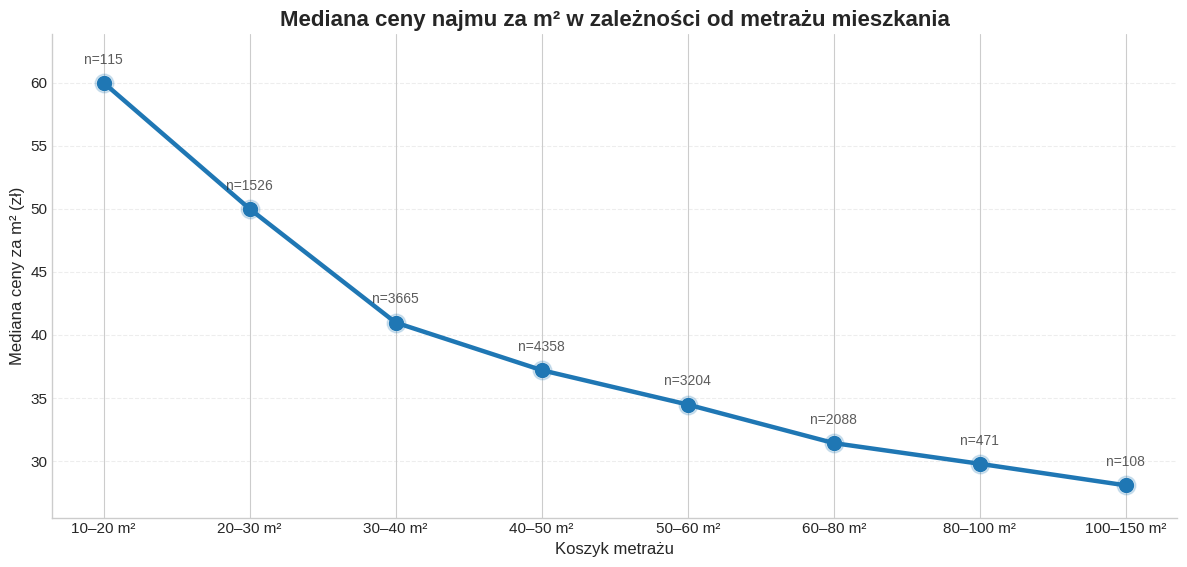

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# USTAWIENIA (spójne dla wszystkich wykresów)
# =========================
FILE_PATH = "rent-poznan.xlsx"  # <- jeśli masz inaczej, zmień
SEED = 42

# Zakres metrażu wymagany przez Ciebie
AREA_MIN = 10
AREA_MAX = 150

# Obcięcia skrajności (robimy to samo wszędzie)
# Uwaga: możesz dostroić, ale trzymaj konsekwentnie w całym projekcie
Q_AREA = (0.01, 0.99)       # percentyle dla metrażu (opcjonalnie)
Q_PRICE = (0.01, 0.995)     # percentyle dla ceny całkowitej
Q_PPM2 = (0.01, 0.99)       # percentyle dla ceny za m²

# Koszyki metrażu (stałe, żeby porównania były spójne)
AREA_BINS = [10, 20, 30, 40, 50, 60, 80, 100, 150]
AREA_LABELS = ["10–20 m²","20–30 m²","30–40 m²","40–50 m²","50–60 m²","60–80 m²","80–100 m²","100–150 m²"]

# =========================
# 1) Wczytanie + bazowe czyszczenie
# =========================
df = pd.read_excel(FILE_PATH)

# Minimalny zestaw kolumn do tych analiz
cols_needed = ["price", "flat_area", "quarter"]
df = df[cols_needed].copy()

# Drop NA i oczywiste błędy
df = df.dropna(subset=["price", "flat_area", "quarter"])
df = df[(df["price"] > 0) & (df["flat_area"] > 0)]

# Cena za m²
df["price_per_m2"] = df["price"] / df["flat_area"]

# =========================
# 2) SPÓJNE filtry (to jest klucz do spójnych n na wykresach)
# =========================
# (A) twardy zakres metrażu wymagany przez Ciebie
df_base = df[df["flat_area"].between(AREA_MIN, AREA_MAX)].copy()

# (B) dodatkowo (opcjonalnie) obcięcie skrajności na metrażu percentylami
a_lo, a_hi = df_base["flat_area"].quantile(Q_AREA)
df_base = df_base[df_base["flat_area"].between(a_lo, a_hi)].copy()

# (C) obcięcie skrajności na cenie całkowitej
p_lo, p_hi = df_base["price"].quantile(Q_PRICE)
df_base = df_base[df_base["price"].between(p_lo, p_hi)].copy()

# (D) obcięcie skrajności na cenie za m² (ważne przy “podejrzanie wysokich medianach”)
ppm2_lo, ppm2_hi = df_base["price_per_m2"].quantile(Q_PPM2)
df_base = df_base[df_base["price_per_m2"].between(ppm2_lo, ppm2_hi)].copy()

# =========================
# 3) SANITY CHECK (wydruki kontrolne)
# =========================
print("=== SANITY CHECK (po spójnych filtrach) ===")
print(f"Liczba rekordów: {len(df_base):,}")
print(f"Metraż: min={df_base['flat_area'].min():.2f}, med={df_base['flat_area'].median():.2f}, max={df_base['flat_area'].max():.2f}")
print(f"Cena:   min={df_base['price'].min():.0f}, med={df_base['price'].median():.0f}, max={df_base['price'].max():.0f}")
print(f"zł/m²:  min={df_base['price_per_m2'].min():.2f}, med={df_base['price_per_m2'].median():.2f}, max={df_base['price_per_m2'].max():.2f}")
print("\nTop dzielnice (liczba ofert):")
print(df_base["quarter"].value_counts().head(10))

# =========================
# 4) Koszyki metrażu + statystyki (to naprawia problem różnych 'n')
# =========================
df_base["area_bin"] = pd.cut(
    df_base["flat_area"],
    bins=AREA_BINS,
    labels=AREA_LABELS,
    include_lowest=True,
    right=False
)

area_stats = (
    df_base
    .dropna(subset=["area_bin"])
    .groupby("area_bin", observed=True)["price_per_m2"]
    .agg(median="median", n="size")
    .reindex(AREA_LABELS)   # stała kolejność osi
)

# =========================
# 5) WYKRES: Mediana ceny za m² vs koszyki metrażu (estetyka “reportowa”)
# =========================
fig, ax = plt.subplots(figsize=(12, 5.8))

x = np.arange(len(area_stats.index))
y = area_stats["median"].values
n = area_stats["n"].values

# linia + markery
ax.plot(
    x, y,
    linewidth=3.2,
    marker="o",
    markersize=10,
)

# delikatny “halo” na markerach (czytelność)
ax.scatter(x, y, s=180, alpha=0.18)

# adnotacje n=... (przesunięcie, żeby nie nachodziło na linię)
y_offset = (np.nanmax(y) - np.nanmin(y)) * 0.04
for xi, yi, ni in zip(x, y, n):
    if np.isfinite(yi):
        ax.text(xi, yi + y_offset, f"n={int(ni)}", ha="center", va="bottom", fontsize=10, alpha=0.75)

# osie i opisy
ax.set_title("Mediana ceny najmu za m² w zależności od metrażu mieszkania", fontsize=16, weight="bold")
ax.set_xlabel("Koszyk metrażu")
ax.set_ylabel("Mediana ceny za m² (zł)")

ax.set_xticks(x)
ax.set_xticklabels(area_stats.index, rotation=0)

# styl
ax.grid(axis="y", linestyle="--", alpha=0.35)
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# przyjemniejsze marginesy na Y
ymin = np.nanmin(y) - 2 * y_offset
ymax = np.nanmax(y) + 3 * y_offset
ax.set_ylim(ymin, ymax)

plt.tight_layout()
plt.show()
